In [1]:
import os
import random

import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as pyplot
from src.img_loader import load_frame
from src.coord_handler import generate_coords
from src.augmentator import MoasicAugmentator

In [2]:
augmenator = MoasicAugmentator(os.getenv('DATASET_PATH'), os.getenv('SAVE_PATH'))

In [3]:
augmenator.start_augmentation(end_idx=10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:16<00:00,  1.65s/it]


# Просмотр аугментации

In [73]:
dataset_dir = '/mnt/disk4/datasets/summer_space_augmented'
img_dir = os.path.join(dataset_dir, 'images')
mask_dir = os.path.join(dataset_dir, 'labels')

img_names = [name for name in os.listdir(img_dir) if name.endswith('.jp2')]
img_paths = [os.path.join(img_dir, name) for name in img_names]
mask_paths = [os.path.join(mask_dir, name) for name in img_names]

In [74]:
def plot(frame):
    frame[frame>2500] = 2500
    fig, (ax_old, ax_new, ax_mask) = pyplot.subplots(1,3, figsize=(21,7))
    show(np.stack((frame[15,...],frame[14,...], frame[13,...]), axis = 0), ax=ax_old, adjust=True, title='old')
    show(np.stack((frame[3,...],frame[2,...], frame[1,...]), axis = 0), ax=ax_new, adjust=True, title='new')
    show(frame[-1,...], ax=ax_mask, title='mask')

In [75]:
img_paths = iter(img_paths)
mask_paths = iter(mask_paths)

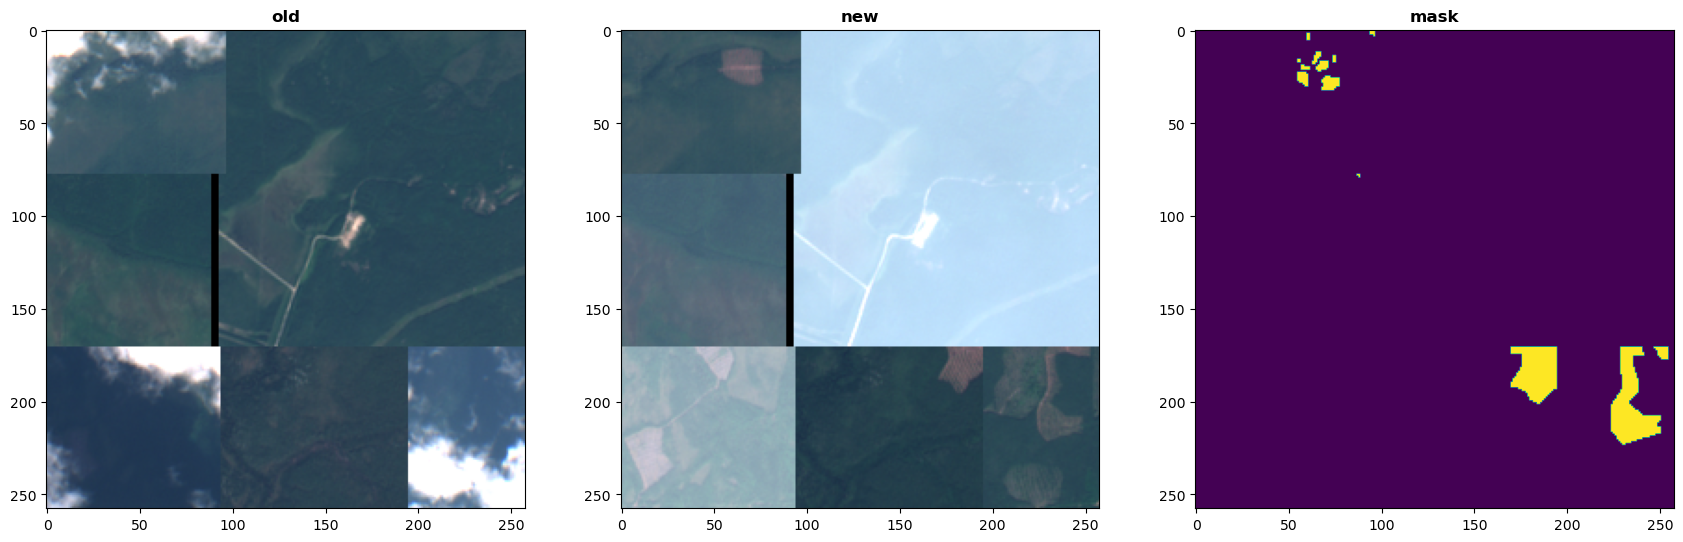

<Axes: title={'center': 'mask'}>

In [91]:

frame, src = load_frame(next(img_paths), next(mask_paths))
plot(frame)
show(frame[-1,...])